### Assignment 8.2 

Find the optimal number of components needed to maximize the quality of a solution to a multiclass classification problem based on the MNIST dataset using logistic regression.

Your task is to determine which PCA dimension of [1,3,5,10,15,20,30,40,50,60] is optimal for solving the classification problem.

In your answer, indicate the value of n_components, at which you got the best result on the test set. By quality we mean accuracy_score.

#### Solution

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# np.random.seed(42)

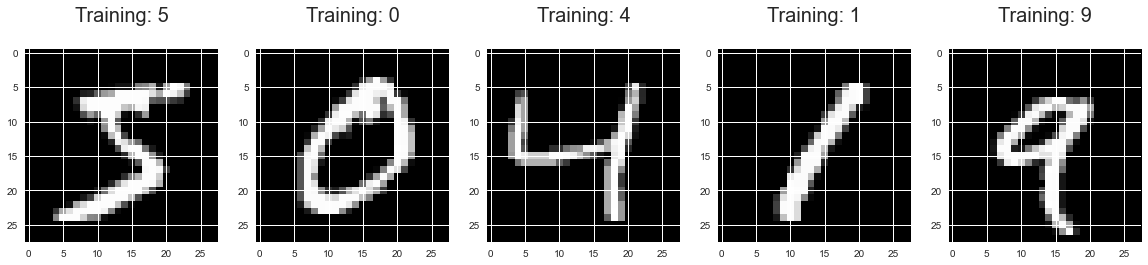

In [10]:
mnist = fetch_openml('mnist_784')

X_ = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X_ = X_[:2000]
y = y[:2000]

plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(X_[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

In [11]:
X_.shape

(2000, 784)

In [12]:
N_COMP = [1,3,5,10,15,20,30,40,50,60] 

In [13]:
scores = {}

for n_comp in N_COMP:
    X = PCA(n_components=n_comp).fit_transform(X_)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, shuffle=True, random_state=42 )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = LogisticRegression(max_iter=500, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores[n_comp] = round(accuracy_score(y_test, y_pred), 4)
    
scores

{1: 0.2917,
 3: 0.4267,
 5: 0.6833,
 10: 0.8033,
 15: 0.835,
 20: 0.8567,
 30: 0.875,
 40: 0.865,
 50: 0.865,
 60: 0.8583}

### Assignment 8.1

In this task, we suggest that you independently implement one of the possible algorithms for estimating the optimal (effective) dimension, which is often called the steep slope method.

We will work within the framework of the simplest assumptions about the linearity of the original sample (we will assume that the coordinates of objects in the dataset are linearly related with some Gaussian noise), that is, we will work with the PCA algorithm.

    1. Download data
    2. Write a function Em that implements the above method
    3. Find the minimum m such that Em < 0.2

In your answer, indicate the found number m.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (5, 3.8)

In [2]:
x = np.load('PCA.npy')

In [3]:
def Em(sigma: np.array, m: int):
    return sigma[m::].sum() / sigma.sum()

In [4]:
_, s, _ = np.linalg.svd(x)

In [5]:
m = np.arange(1, s.size)
em = np.array([ Em(s, m_) for m_ in m ])

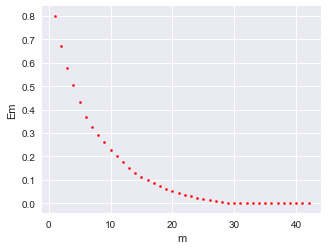

In [6]:
plt.scatter(m, em, s=5, color='red')
plt.xlabel('m')
plt.ylabel('Em')
plt.show()

In [7]:
ind = np.where(em <= 0.2)[0]

In [8]:
m = ind[0] + 1
m

12